In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# to create train/test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()
# Removing the fields that have nothing to do with the count.
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As seen from the above output that, no data cleanup is needed, because we do not have any null values.

In [6]:

df.head()
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


<Axes: xlabel='weathersit', ylabel='cnt'>

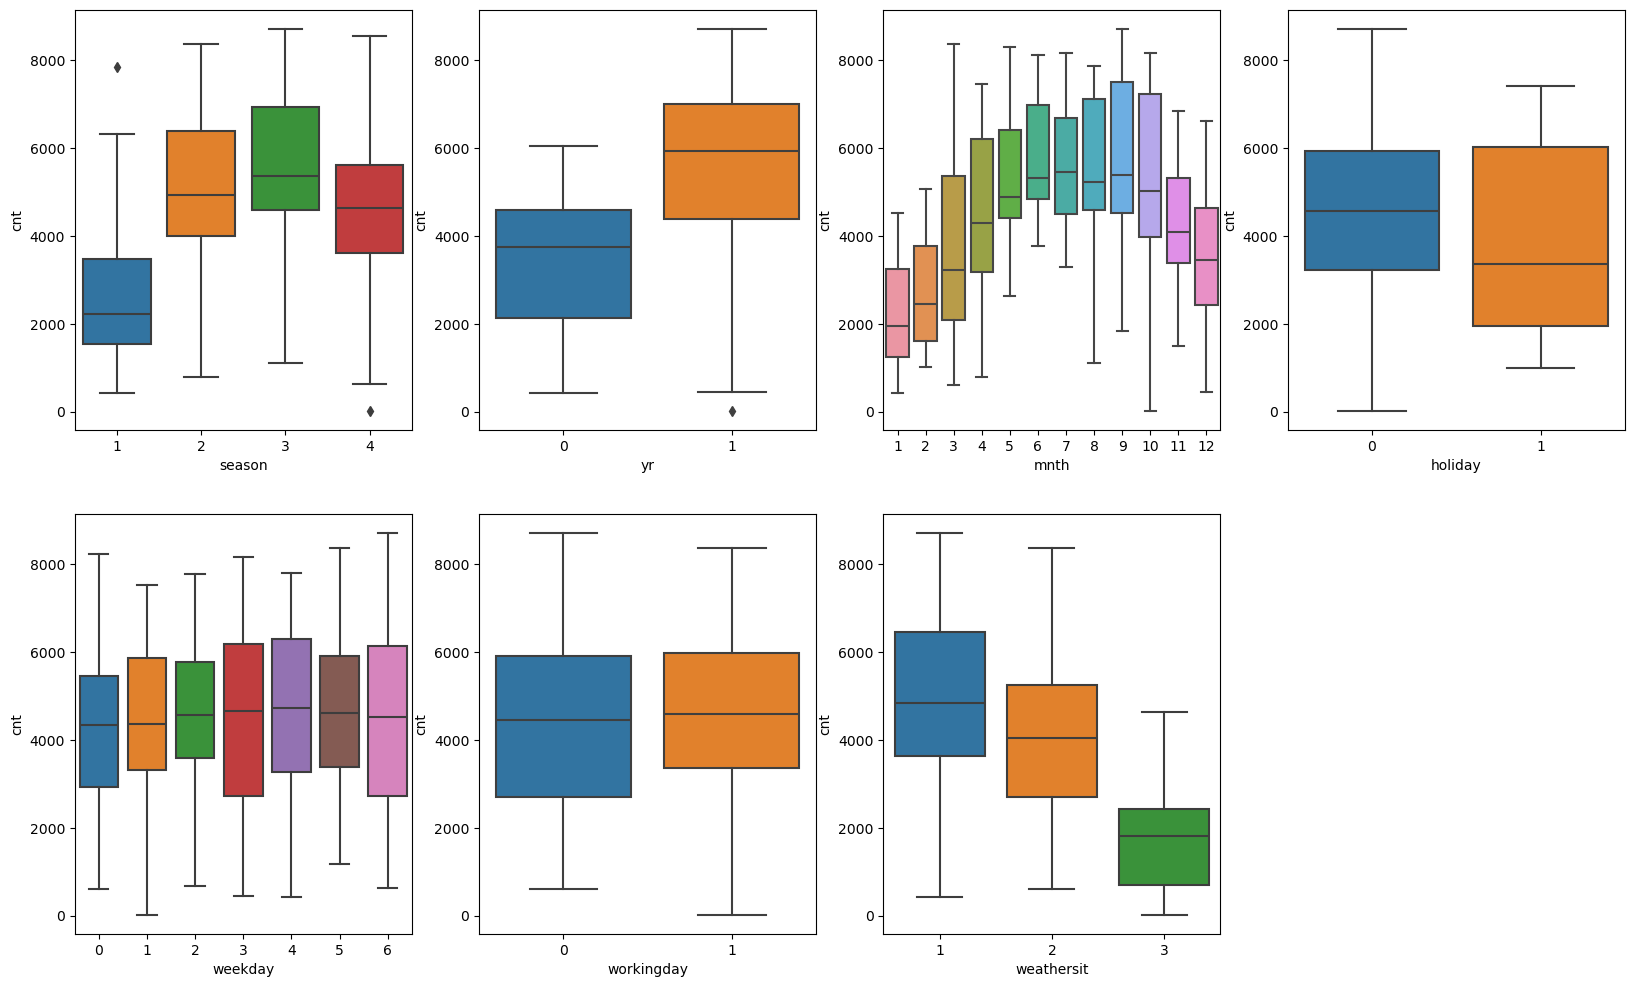

In [7]:
#To check the categorical factors affecting the count

plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=df)


plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=df)


plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=df)


plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=df)


plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=df)



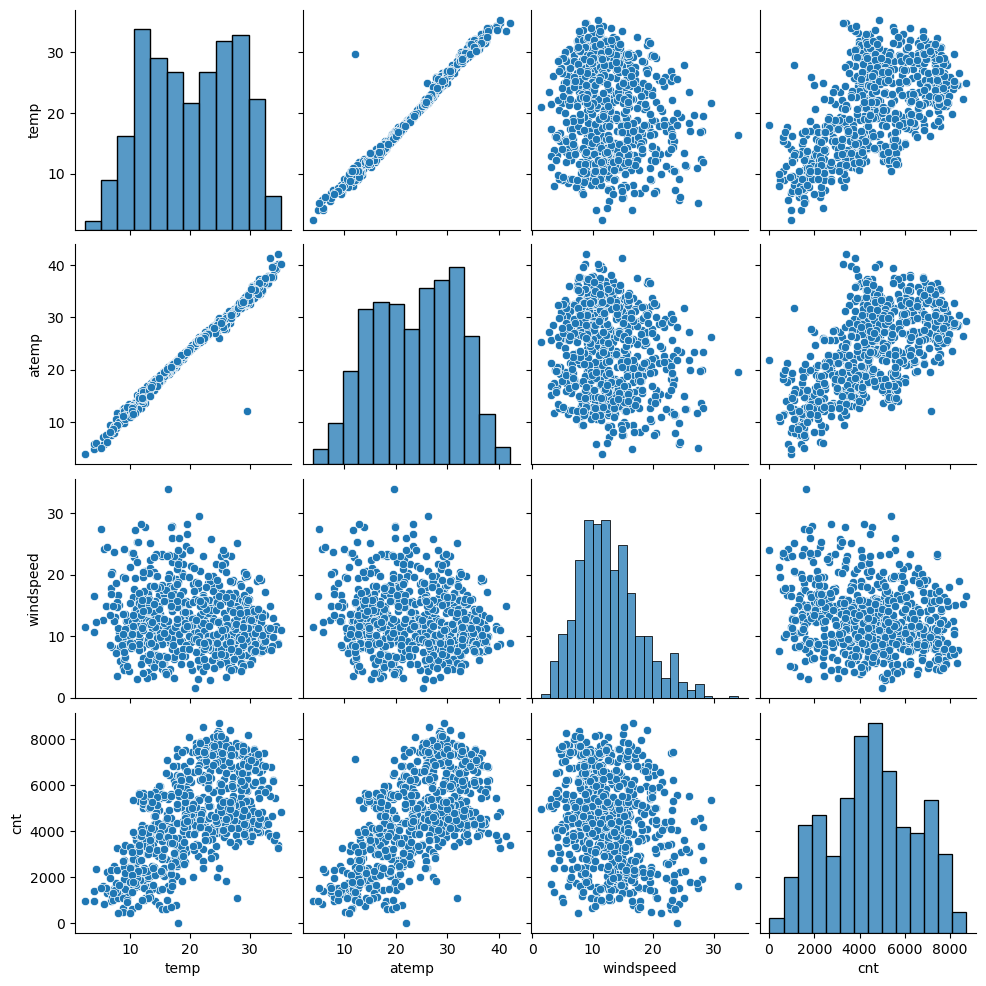

In [9]:
# Visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','windspeed','cnt'])
plt.show()

In [10]:
# Get the dummy fields
season_dm = pd.get_dummies(df['season'], drop_first= True)
season_dm.head()

,2,3,4
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [11]:
# Rename them according to the data dictionary
season_dm.rename(columns={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)
season_dm.astype(int)

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [12]:
# Get the dummy fields
yr_dm = pd.get_dummies(df['yr'], drop_first= True)
yr_dm.head()

,1
0,False
1,False
2,False
3,False
4,False


In [13]:
# Rename them according to the data dictionary
yr_dm.rename(columns={0: '2018', 1: '2019'}, inplace=True)
yr_dm.head()

,2019
0,False
1,False
2,False
3,False
4,False


In [14]:
# Get the dummy fields
mnth_dm = pd.get_dummies(df['mnth'], drop_first= True)
mnth_dm.head()

,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# Rename them according to the data dictionary
mnth_dm.rename(columns={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
mnth_dm.head()

,Feb,Mar,Apr,May,Jun,July,Aug,Sept,Oct,Nov,Dec
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Get the dummy fields
weathersit_dm = pd.get_dummies(df['weathersit'], drop_first= True)
weathersit_dm.head()

,2,3
0,True,False
1,True,False
2,False,False
3,False,False
4,False,False


In [17]:
# Rename them according to the data dictionary
weathersit_dm.rename(columns={1: 'clear', 2: 'cloudy', 3: 'thunderstorm'}, inplace=True)
weathersit_dm.head()

,cloudy,thunderstorm
0,True,False
1,True,False
2,False,False
3,False,False
4,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [19]:
# get the integer value from the boolean values 
df = pd.concat([df, season_dm.astype(int), yr_dm.astype(int), mnth_dm.astype(int), weathersit_dm.astype(int)], axis=1)

In [20]:
# remove the fields for which we have calculated the dummy values + remove the 'weekday' and 'workingday' as well
# because their seems like negligible variation in the boxplot data
df = df.drop(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'], axis = 1)

In [21]:
df.head()

,holiday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2019,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,cloudy,thunderstorm
0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


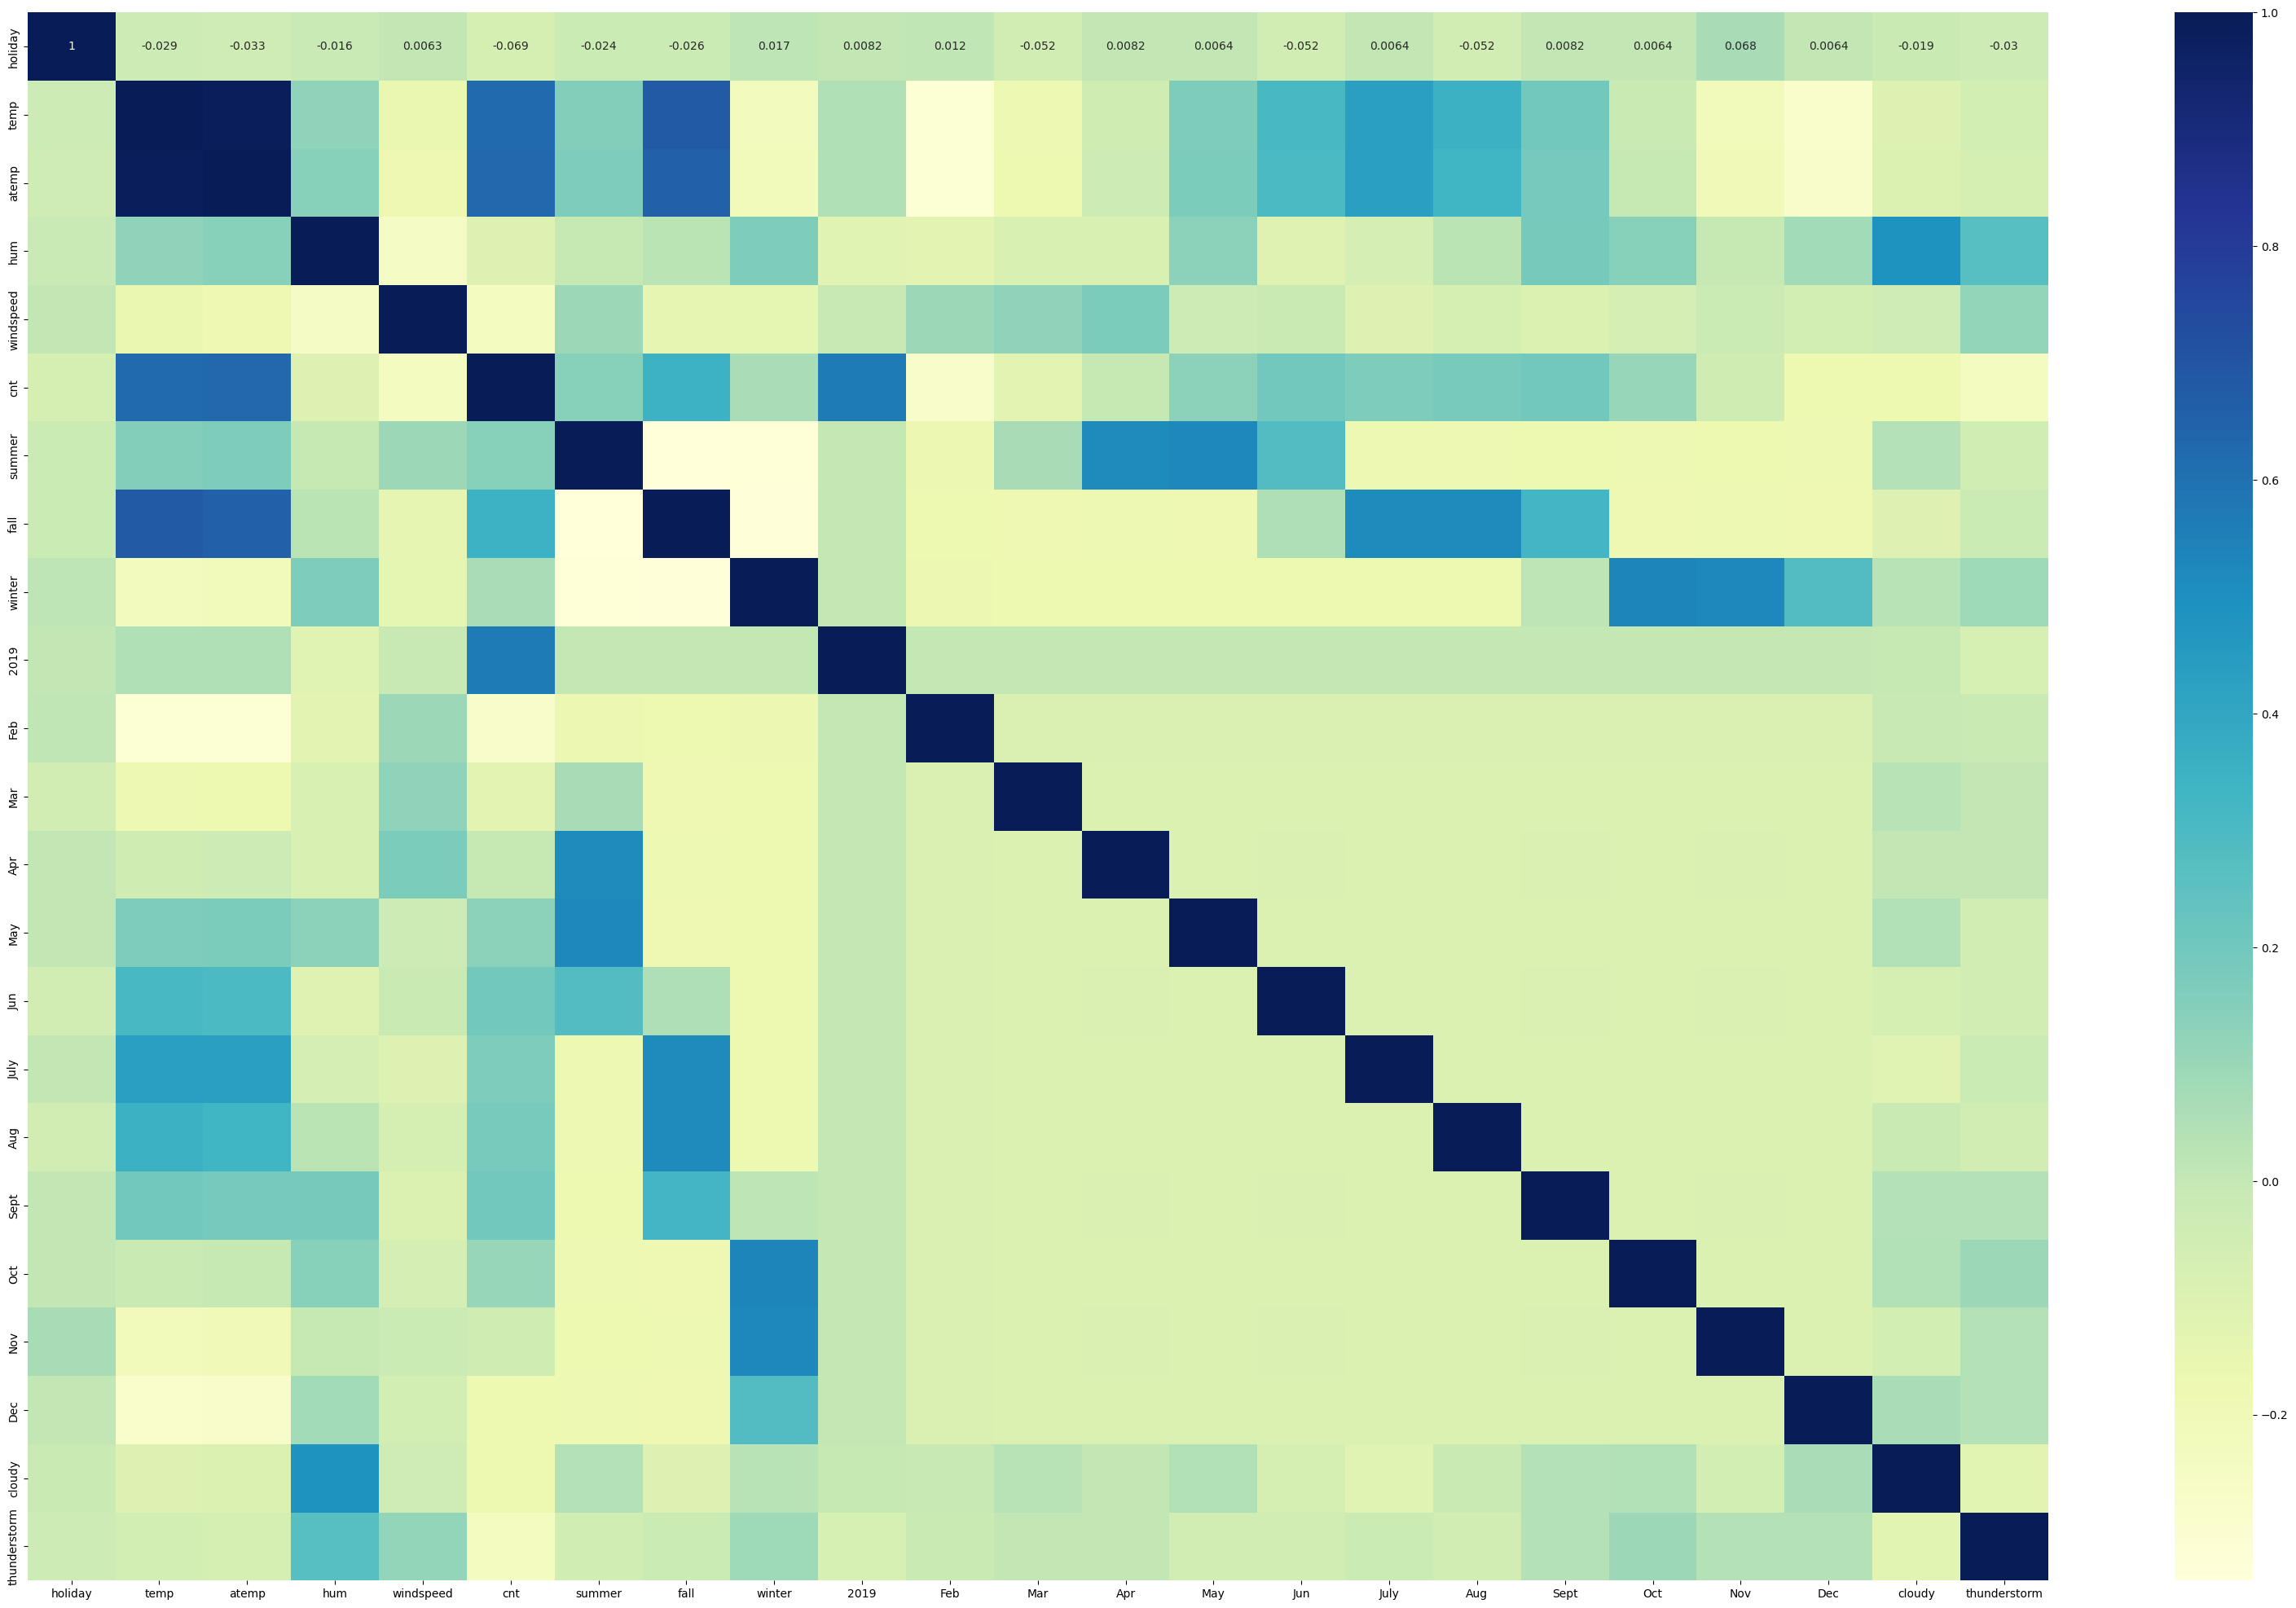

In [22]:
# Check the correlation between the variables
plt.figure(figsize = (40, 25))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [23]:
df.head()

,holiday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2019,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,cloudy,thunderstorm
0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       730 non-null    int64  
 1   temp          730 non-null    float64
 2   atemp         730 non-null    float64
 3   hum           730 non-null    float64
 4   windspeed     730 non-null    float64
 5   cnt           730 non-null    int64  
 6   summer        730 non-null    int32  
 7   fall          730 non-null    int32  
 8   winter        730 non-null    int32  
 9   2019          730 non-null    int32  
 10  Feb           730 non-null    int32  
 11  Mar           730 non-null    int32  
 12  Apr           730 non-null    int32  
 13  May           730 non-null    int32  
 14  Jun           730 non-null    int32  
 15  July          730 non-null    int32  
 16  Aug           730 non-null    int32  
 17  Sept          730 non-null    int32  
 18  Oct           730 non-null    

In [25]:
# Create training and test data (70% training and rest test data)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [26]:
print(df_train.shape)
print(df_test.shape)

(510, 23)
(220, 23)


In [27]:
# Use the Min-Max scaling technique to scale the training set
scaler = MinMaxScaler()
# taking the continuous variables
num_var = ['temp','atemp','hum','windspeed','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,holiday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2019,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,cloudy,thunderstorm
576,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
426,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
728,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
482,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
111,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
# separate the target and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [30]:
X_train.head()

,holiday,temp,atemp,hum,windspeed,summer,fall,winter,2019,Feb,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,cloudy,thunderstorm
576,0,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
426,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
#Initialize and fit the training model
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [32]:
#Select the first 20 variables to fit
rfe = RFE(lm, n_features_to_select=20)


In [33]:
rfe = rfe.fit(X_train, y_train)

In [34]:
#Fetch rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Feb', True, 1),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', True, 1),
 ('July', True, 1),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 2),
 ('Dec', False, 3),
 ('cloudy', True, 1),
 ('thunderstorm', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]

In [36]:
X_train.columns[~rfe.support_]

Index(['Nov', 'Dec'], dtype='object')

In [37]:
# Add constant to the training data and calculate the Ordinary Least Square
X_train = X_train[col]
X_train_rfe = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.01e-184
Time:                        04:19:03   Log-Likelihood:                 516.52
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     489   BIC:                            -902.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2266      0.028      7.979   

In [38]:
#Also calculate the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
1,temp,438.875493
2,atemp,378.020085
3,hum,18.122644
6,fall,13.107958
5,summer,8.483519
15,Aug,7.794589
14,July,6.909010
12,May,5.896357
13,Jun,5.788582
11,Apr,4.674608


In [39]:
#Since July predictor has most p-value 0.861, hence removing it from the list
X = X_train.drop(['July'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     142.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.53e-185
Time:                        04:19:03   Log-Likelihood:                 516.50
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     490   BIC:                            -908.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2264      0.028      7.985   

In [40]:
#Since atemp predictor has most p-value 0.796, hence removing it from the list
X = X.drop(['atemp'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.10e-186
Time:                        04:19:03   Log-Likelihood:                 516.47
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     491   BIC:                            -914.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2267      0.028      8.007   

In [41]:
#Since Feb predictor has most p-value 0.271, hence removing it from the list

X = X.drop(['Feb'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.00e-187
Time:                        04:19:03   Log-Likelihood:                 515.84
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     492   BIC:                            -919.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2344      0.027      8.544   

In [42]:
#Since Apr predictor has most p-value 0.123, hence removing it from the list

X = X.drop(['Apr'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          7.42e-188
Time:                        04:19:03   Log-Likelihood:                 514.60
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     493   BIC:                            -923.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2378      0.027      8.682   

In [43]:
#Since Jun predictor has most p-value 0.268, hence removing it from the list

X = X.drop(['Jun'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.00e-188
Time:                        04:19:03   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665   

In [44]:
#Since May predictor has most p-value 0.115, hence removing it from the list

X = X.drop(['May'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.46e-189
Time:                        04:19:03   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.525   

In [45]:
#Since fall predictor has most p-value 0.112, hence removing it from the list

X = X.drop(['fall'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          5.94e-190
Time:                        04:19:04   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2326      0.027      8.525   

In [46]:
#Since Mar predictor has most p-value 0.101, hence removing it from the list

X = X.drop(['Mar'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.49e-190
Time:                        04:19:04   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.838   

In [47]:
# Now since all the p-values are within our assumed significance level of 0.05 , Lets calculate the VIF to correlate our findings
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
2,hum,14.379825
1,temp,9.881889
3,windspeed,3.587183
5,winter,2.247185
10,cloudy,2.134961
6,2019,2.016237
4,summer,1.835062
7,Aug,1.599238
9,Oct,1.595486
8,Sept,1.337041


In [48]:
#Since hum predictor has most VIF of 14.37, hence removing it from the list

X = X.drop(['hum'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          9.45e-187
Time:                        04:19:04   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1346      0.017      8.014   

In [49]:
#Since Oct predictor has most p-value 0.082, hence removing it from the list

X = X.drop(['Oct'], axis=1)
X_train_rfe = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.62e-187
Time:                        04:19:04   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837   

In [50]:
# Now since all the p-values are within our assumed significance level of 0.05 , Lets calculate the VIF to correlate our findings

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
1,temp,5.012840
2,windspeed,3.103226
5,2019,2.000292
3,summer,1.815872
6,Aug,1.581198
8,cloudy,1.491031
4,winter,1.483394
7,Sept,1.307124
9,thunderstorm,1.081314
0,holiday,1.036152


In [51]:
# Now since all the VIFs are approximately equal or less than 5 , lets predict the y value from X_train_rfe
y_train_count = lm.predict(X_train_rfe)

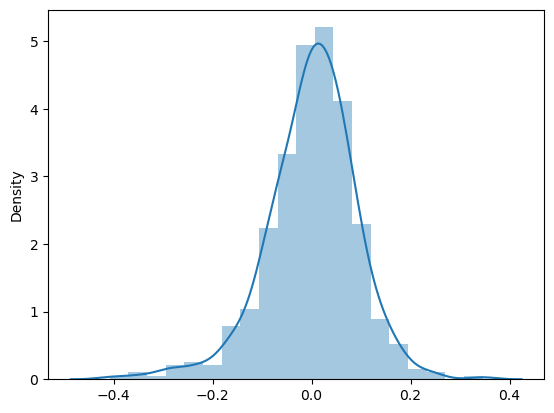

In [52]:
# Now to validate our MLR model, lets create a displot and check if we see a normal distribution curve.
plt.figure()
sns.distplot((y_train - y_train_count), bins=20)
plt.show()

In [53]:
#The bell shape curve proves our assumptions of Linear Regression, with mean at approx 0.0

In [54]:
# Scale the test data sample with the help of the scaler instance from training step
num_var = ['temp','atemp','hum','windspeed','cnt']
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,holiday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2019,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,cloudy,thunderstorm
184,1,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
535,0,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
299,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
#Separate the target and independent variables
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
X_test_new = X_test[X.columns]

In [57]:
#Add the constant
X_test_new = sm.add_constant(X_test_new)

In [58]:
#Make predictions on the test data
y_pred = lm.predict(X_test_new)

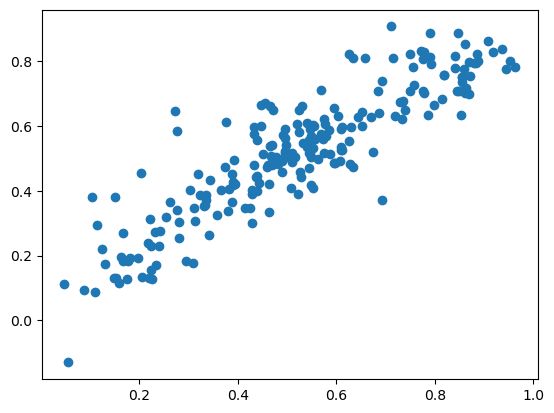

In [59]:
#A scatter plot to verify our predictions
fig = plt.figure()
plt.scatter(y_test, y_pred)

### R2 for the test Data

In [60]:
r2_score(y_test, y_pred)

0.7935224695104377

### R2 for the train Data

In [61]:
y = lm.predict(X_train_rfe)
r2_score(y_train, y)

0.8338606244120907

### Which variables are significant in predicting the demand for shared bikes.

1. holiday
2. temp
3. windspeed
4. summer
5. winter
6. 2019
7. Aug
8. Sept
9. cloudy
10. thunderstorm

### How well those variables describe the bike demands

1. Training Data provides R2 = 83.4%
2. Test Data provides R2 = 79.4%

